<h1>Titanic Machine Learning Competition Kaggle</h1>

In [321]:
#importing libraries that are going to be needed for our visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1>Getting Training and Test Data from the files</h1>

In [322]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Getting an Overview of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
#Basic info of no of features and sample data 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [324]:
#Analysis of given Data

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Recognising unimportant cells whose data is not given</h3>

In [325]:
# Cabin is very incomplete and we do not need name,passengerID, Ticket and cabin


train_data = train_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
test_data = test_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
train_data.head() # check everything looks okay

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<h2>Data Visualisation</h2>

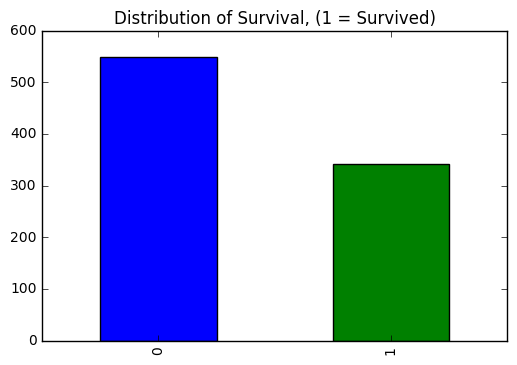

In [326]:
#Data Exploration and visualisation
train_data.Survived.value_counts().plot(kind = 'bar')
plt.title('Distribution of Survival, (1 = Survived)')

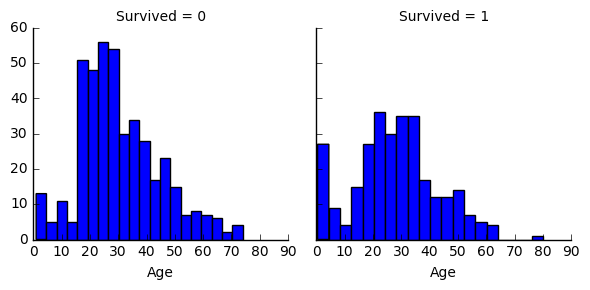

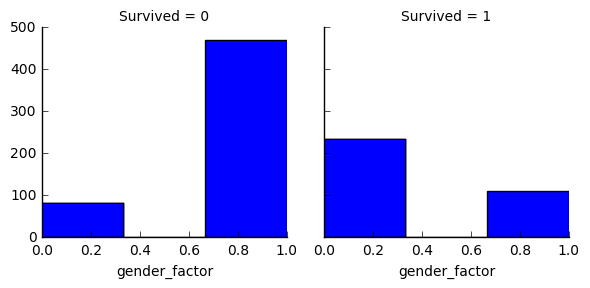

In [327]:
#Survival dependence wrt to Age and Gender of a person


g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
train_data['gender_factor'] = train_data['Sex'].astype('category').cat.codes
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'gender_factor', bins=3)

In [328]:
test_data['gender_factor'] = test_data['Sex'].astype('category').cat.codes

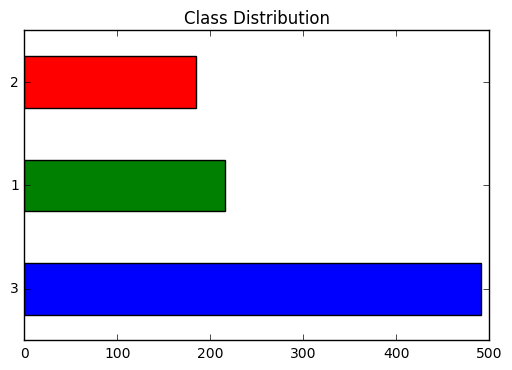

In [329]:
#No of people from different classes

train_data.Pclass.value_counts().plot(kind='barh')
plt.title('Class Distribution')

<h3>Visualisation on the basis of Pclass</h3>

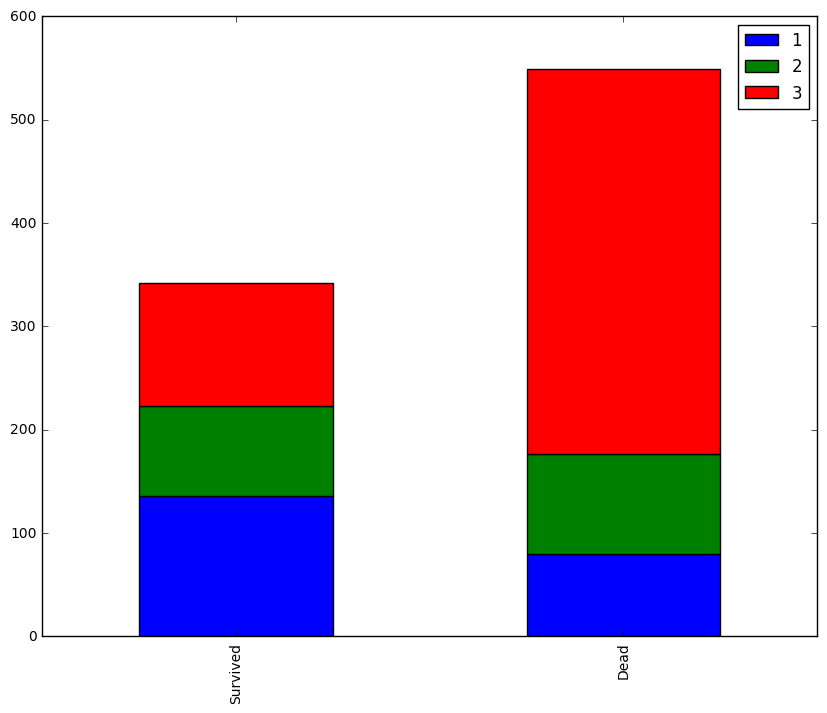

In [330]:
#Visualisation of survival on the basis of Class


pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

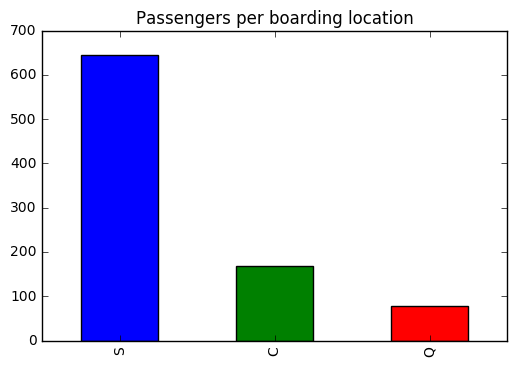

In [331]:
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

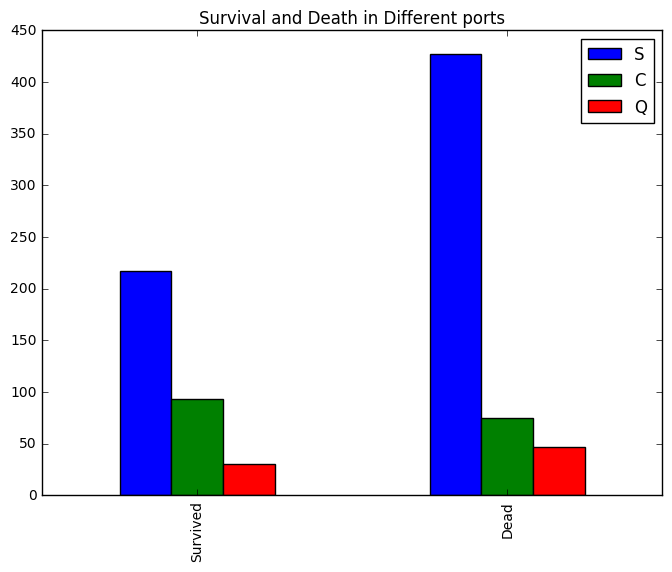

In [332]:
survived = train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title("Survival and Death in Different ports")

In [333]:
#COnverting String Variables to int

def wrangle(dataset):
    # sex {male, female} to {0, 1}
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    # embarked {S, C, Q} => 3 binary variables
    embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return dataset.drop('Embarked', axis=1)
 
train_data = wrangle(train_data)
test_data = wrangle(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,gender_factor,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,1


In [334]:
corr = train_data.corr()
print(corr)

               Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived       1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass        -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex            0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age           -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp         -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch          0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare           0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
gender_factor -0.543351  0.131900 -1.000000  0.093254 -0.114631 -0.245489   
Embarked_C     0.168240 -0.243292  0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q     0.003650  0.221009  0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S    -0.155660  0.081720 -0.125722 -0.032523  0.070941  0.063036   

                   Fare  gender_factor  Embarked_C  Embarked_Q  Embarked_S 

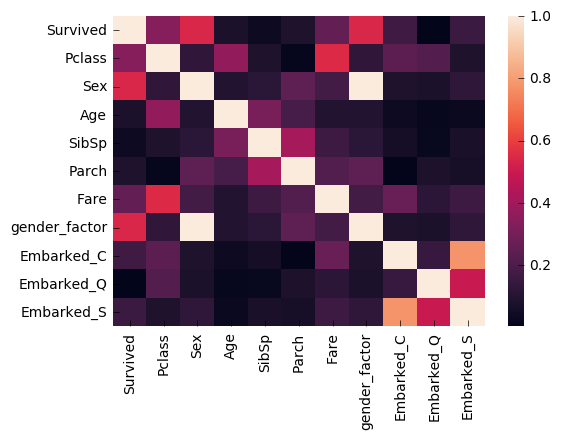

In [335]:
#heatmap denoting relation between features

sns.heatmap(np.abs(corr),          # use absolute values
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [336]:
#guessing ages of People whose ages aren't mentioned

guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

In [337]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [338]:
train_data = train_data.drop(labels = ['gender_factor','FamilySize'],axis=1)
test_data = test_data.drop(labels = 'gender_factor',axis = 1)

In [339]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.4 KB
None


In [340]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(5), uint8(3)
memory usage: 20.9 KB
None


In [341]:
mean_fare = 32
test_data['Fare'] = test_data['Fare'].fillna(32)


<h1>Prediction Using different models</h1>

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [343]:
X_train = train_data.drop("Survived", axis=1)[:800]
Y_train = train_data["Survived"][:800]
X_crossValidation = train_data.drop("Survived", axis=1)[800:]
Y_crossValidation = train_data["Survived"][800:]
X_test = test_data

In [344]:
Y_train.shape

(800,)

In [345]:
X_train.shape

(800, 9)

<h1>LOGISTIC REGRESSION</h1>

In [347]:
#Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_logistic.score(X_crossValidation, Y_crossValidation) * 100, 2)
tvect = TfidfVectorizer()
train = tvect.fit_transform(X_train)
test = tvect.transform(X_test)
Y_predL = model_logistic.predict(test)
print(train_accuracy)
print(validation_accuracy)


80.0
82.42


In [348]:
test.shape

(9, 9)

<h1>SVM Prediction</h1>

In [349]:
svc = SVC()
svc.fit(X_train, Y_train)
train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(svc.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = svc.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

89.75
78.02


<h1>K nearest neighbors</h1>

In [286]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
train_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(knn.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predK = knn.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

82.5
75.82


<h1>Random Forest Classifier Prediction</h1>

In [350]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(random_forest.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predR = random_forest.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

97.88
85.71


<h1>Creating Submission File</h1>

In [351]:
test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_predR
    })
submission.to_csv('submission.csv', index=False)

In [352]:
df = pd.read_csv('submission.csv')

In [353]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
